<a href="https://colab.research.google.com/github/MauriJ/Visualizacion_Bancor/blob/main/Clase%203/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 4. Herramientas para la visualización de datos. Academia Data Driven.

## Clase N°3

### Docente: [Mauricio Morán](www.linkedin.com/in/mauricio-moran)

En la Clase 2 vimos la utilidad de la combinación Matplotlib + Pandas, los gráficos estadísticos de Seaborn y los mapas realizados con Geopandas y Folium. En esta clase aprenderemos cómo realizar gráficos que permiten explorar el análisis por componentes principales (*Principal Component Analysis*, PCA) y la predicciones realizadas mediante árboles de decisión, tanto para clasificación como su variante para regresión.

Para empezar, importemos algunos paquetes para manipulación de datos y para visualización.

In [56]:
# Paquetes para manipulación de datos
import numpy as np
import pandas as pd

# Paquetes para visualización y armado de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis de componentes principales

In [57]:
from sklearn.decomposition import PCA

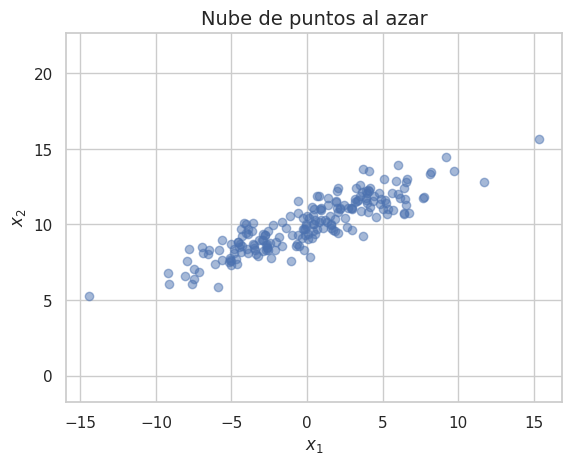

In [58]:
cen_x = 0
cen_y = 10  # Defino los centros de ambas variables

std_x = 5
std_y = 2  # Defino las desviaciones estandar de ambas variables

rho = 0.9
covarianza = rho * std_x  * std_y  # Defino coeficiente de correlacion y calculo covarianza

cov = [[std_x**2, covarianza], [covarianza, std_y**2]]  # Armo matriz de covarianza

X = np.random.multivariate_normal([cen_x, cen_y], cov, 200)  # Creo dos gaussianas con los parámetros que definimos

x1 = X[:, 0]
x2 = X[:, 1]  # Las identifico

plt.scatter(x1, x2, alpha = 0.5)
plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12)
plt.title('Nube de puntos al azar', fontsize = 14)

plt.axis('equal') # Forzamos a que ambos ejes tengan igual longitud
plt.show()

In [59]:
pca = PCA(n_components = 2) # Se aplica PCA, proyectando a dos componentes principales
pca.fit(X)

PCA(n_components=2)

In [106]:
pca?

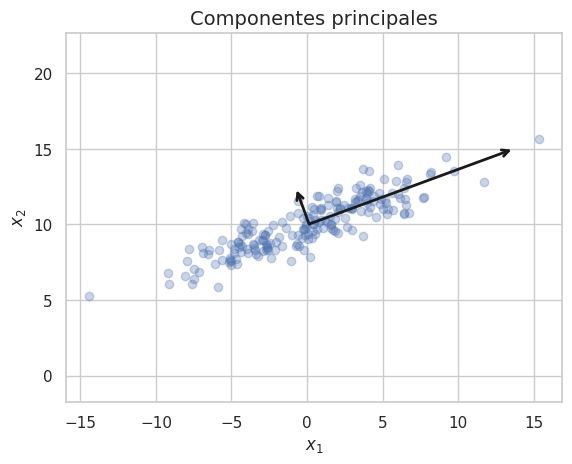

In [61]:
def draw_vector(v0, v1, ax = None): # Función para graficar flechas/vectores
    '''Función que dibuja los autovectores
    obtenidos mediante PCA.'''
    ax = ax or plt.gca()

    # Diccionario con las propiedades de los vectores
    arrowprops = dict(arrowstyle='->',
                     linewidth = 2,
                      color = 'k',
                     shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)

plt.scatter(x1, x2, alpha = 0.3)

# Calculo modulo del vector y se grafica
for vector, longitud in zip(pca.components_, pca.explained_variance_):
    v = 3 * vector * np.sqrt(longitud)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12)
plt.title('Componentes principales', fontsize = 14)
plt.axis('equal') # Forzamos a que ambos ejes tengan igual longitud
plt.show()

### Estandarización

In [62]:
from sklearn.preprocessing import StandardScaler

# Se aplica estandarización
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

x1_std = Xstd[:, 0]
x2_std = Xstd[:, 1]

In [63]:
print(f'El centro de los datos está en {np.mean(Xstd).round(2)} y la desviación estandar es de {np.std(Xstd)}.')

El centro de los datos está en -0.0 y la desviación estandar es de 1.0.


### Comparación datos originales y estandarizados

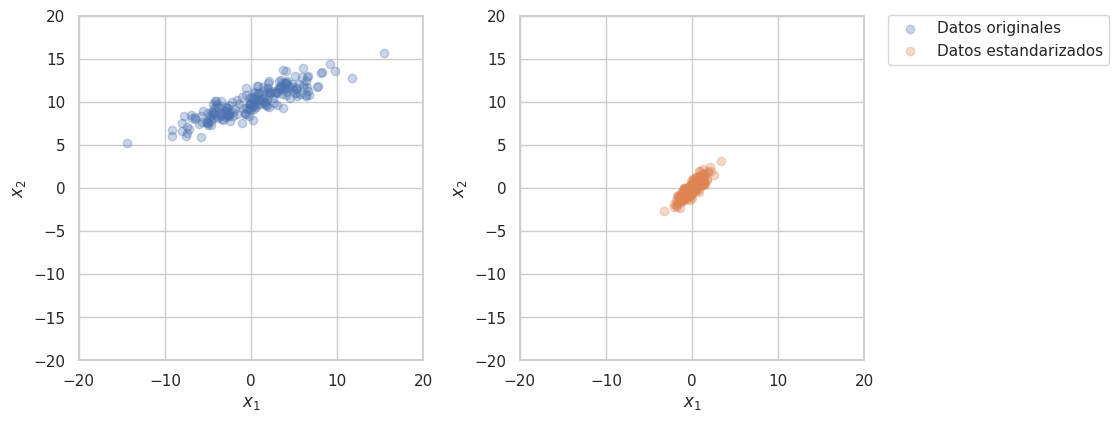

In [64]:
# Grafico datos originales y datos estandarizados
sns.set_theme(style = 'whitegrid')

fig, ax = plt.subplots(1, 2, figsize = (9, 9))

ax[0].scatter(x1, x2, alpha = 0.3, color = 'C0', label = 'Datos originales')
ax[1].scatter(x1_std, x2_std, alpha = 0.3, color = 'C1', label = 'Datos estandarizados')

for i in [0, 1]:
  ax[i].set_xlim(-20, 20)
  ax[i].set_ylim(-20, 20)

  ax[i].set_aspect('equal')

  ax[i].set_xlabel('$x_1$', fontsize = 12)
  ax[i].set_ylabel('$x_2$', fontsize = 12)

fig.legend(bbox_to_anchor = [1.25, 0.701]) # Muevo leyenda manualmente

plt.tight_layout()
plt.show()

In [65]:
# Se aplica PCA a datos con y sin estandarización
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)

pca_std = PCA(n_components = 2)
x_pca_std = pca_std.fit_transform(Xstd)

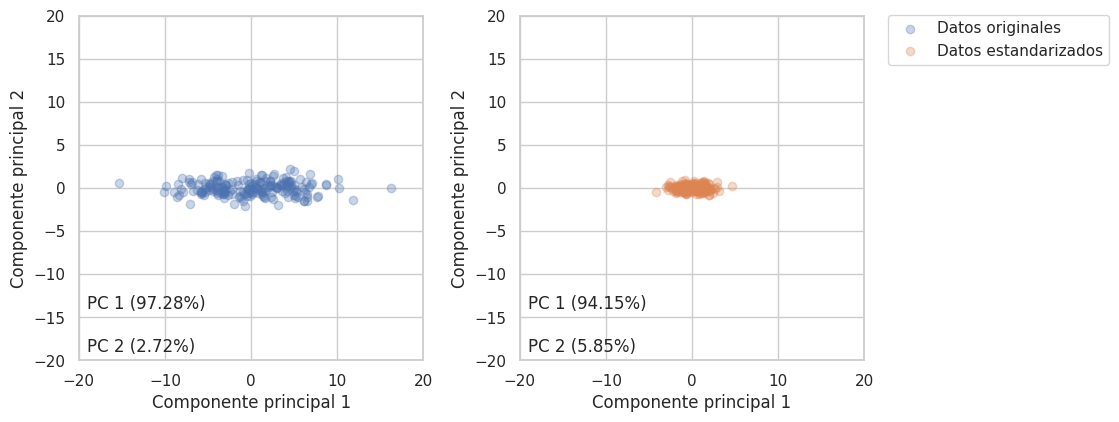

In [66]:
# Comparación PCA aplicado a los datos originales y a los datos estandarizados
fig, ax = plt.subplots(1, 2, figsize = (9, 9))

ax[0].scatter(x_pca[:, 0], x_pca[:, 1], alpha = 0.3, color = 'C0', label = 'Datos originales')
ax[1].scatter(x_pca_std[:, 0], x_pca_std[:, 1], alpha = 0.3, color = 'C1', label = 'Datos estandarizados')

for i, j in zip([0, 1], [pca, pca_std]):
  # Texto informando sobre el porcentaje de varianza explicada
  ax[i].text(-19, -14, f'PC 1 ({j.explained_variance_ratio_[0] * 100:.2f}%)')
  ax[i].text(-19, -19, f'PC 2 ({j.explained_variance_ratio_[1] * 100:.2f}%)')

  ax[i].set_xlim(-20, 20)
  ax[i].set_ylim(-20, 20)

  ax[i].set_aspect('equal') # Otra manera de forzar ejes de igual longitud

  ax[i].set_xlabel('Componente principal 1', fontsize = 12)
  ax[i].set_ylabel('Componente principal 2', fontsize = 12)

fig.legend(bbox_to_anchor = [1.25, 0.701])

plt.tight_layout()
plt.show()

In [67]:
# Se aplica PCA a datos con y sin estandarización, proyectando a un único componente principal
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca) # Vuelve los datos transformados al espacio dimensional original

pca_std = PCA(n_components = 1)
pca_std.fit(Xstd)
X_pca_std = pca_std.transform(Xstd)
X_std_new = pca_std.inverse_transform(X_pca_std) # Vuelve los datos transformados al espacio dimensional original

In [68]:
# pca.inverse_transform?

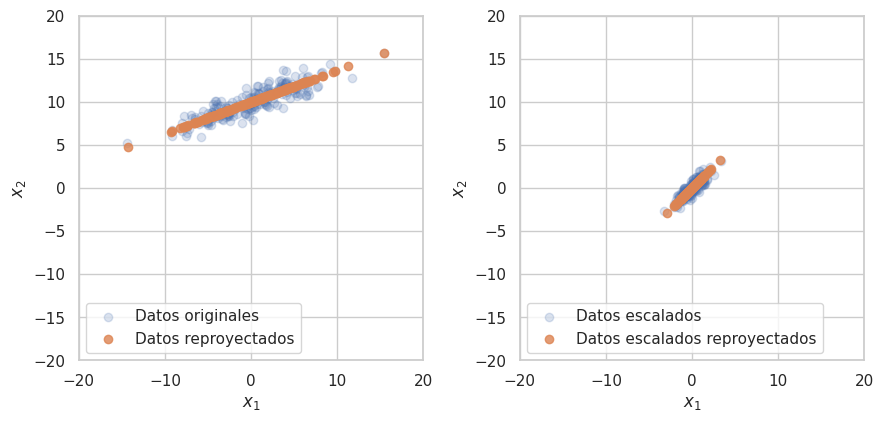

In [69]:
# Comparación PCA aplicado a los datos originales y a los datos estandarizados y luego reproyectados
fig, ax = plt.subplots(1, 2, figsize = (9, 9))

ax[0].scatter(x1, x2, alpha = 0.2, label = 'Datos originales')
ax[0].scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8, label = 'Datos reproyectados')

ax[1].scatter(x1_std, x2_std, alpha = 0.2, label = 'Datos escalados')
ax[1].scatter(X_std_new[:, 0], X_std_new[:, 1], alpha = 0.8, label = 'Datos escalados reproyectados')

for i in [0, 1]:

  ax[i].set_xlim(-20, 20)
  ax[i].set_ylim(-20, 20)

  ax[i].set_aspect('equal')

  ax[i].set_xlabel('$x_1$', fontsize = 12)
  ax[i].set_ylabel('$x_2$', fontsize = 12)

  ax[i].legend(loc = 'lower left') # Leyenda en la posición inferior izquierda

plt.tight_layout()
plt.show()

### Aplicación de PCA

Utilicemos un dataset de juguete al que aplicarle PCA, empleemos el dataset [Penguins](https://github.com/allisonhorst/palmerpenguins).

In [70]:
pinguinos = sns.load_dataset('penguins')
pinguinos.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [71]:
pinguinos.describe().round(1).T # Calculo de algunos valores estadísticos

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.9,5.5,32.1,39.2,44.4,48.5,59.6
bill_depth_mm,342.0,17.2,2.0,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,200.9,14.1,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,4201.8,802.0,2700.0,3550.0,4050.0,4750.0,6300.0


In [72]:
pinguinos.isna().sum() # Chequeo de datos ausentes

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [73]:
pinguinos = pinguinos.dropna() # Eliminación de filas con datos ausentes

In [74]:
# Escalado y PCA
X = pinguinos[['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm', 'body_mass_g']]
Xstd = scaler.fit_transform(X)

pca = PCA(n_components = 3)
Xstd_pca = pca.fit_transform(Xstd)

In [75]:
# Varianza explicada
print('Los porcentajes de varianza explicada son:')

for i in range(0,3):
  print(f'PC {i+1} = {pca.explained_variance_ratio_[i] * 100:.2f}%')

Los porcentajes de varianza explicada son:
PC 1 = 68.63%
PC 2 = 19.45%
PC 3 = 9.22%


In [76]:
# Armado de dataset para facilitar el armado de gráficos
df_pca = pd.DataFrame({'PC1': Xstd_pca[:, 0],
                       'PC2': Xstd_pca[:, 1],
                       'PC3': Xstd_pca[:, 2],
                       'Especie': pinguinos['species']})

df_pca['Especie'] = pd.Categorical(df_pca['Especie'])

Si bien todavía no estudiamos Plotly, lo usaremos para hacer un gráfico interactivo y tridimensional de las tres componentes principales. Volveremos con Plotly la próxima clase.

In [77]:
import plotly.express as px

In [78]:
fig = px.scatter_3d(df_pca, x = 'PC1', y = 'PC2', z = 'PC3', color = 'Especie',
                    labels = {'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3', 'font': {'size': 16}}) # Nombre de los ejes

fig.update_layout(title = {'text': 'Gráfico 3D de análisis de componentes principales', # Título
                           'font': {'size': 20},
                           'x': 0.5})

fig.update_traces(marker = {'line': {'width': 2,          # Personalizamos los puntos
                                     'color': 'black'}})

fig.show()

### Árboles de decisión

En esta sección realizaremos gráficos para visualizar la toma de decisiones realizadas por árboles de decisión tanto de clasificación como de regresión. Además haremos gráficos de superficies de decisión, en el caso de la clasificación, y gráficos de la predicción de la variable objetivo, en el caso de la regresión.

In [79]:
from sklearn import datasets

#### Clasificación

Para los árboles de decisión de clasificación utilizaremos la base de datos de  [flores de Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).




In [80]:
iris = datasets.load_iris()

In [81]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [82]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [83]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [84]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


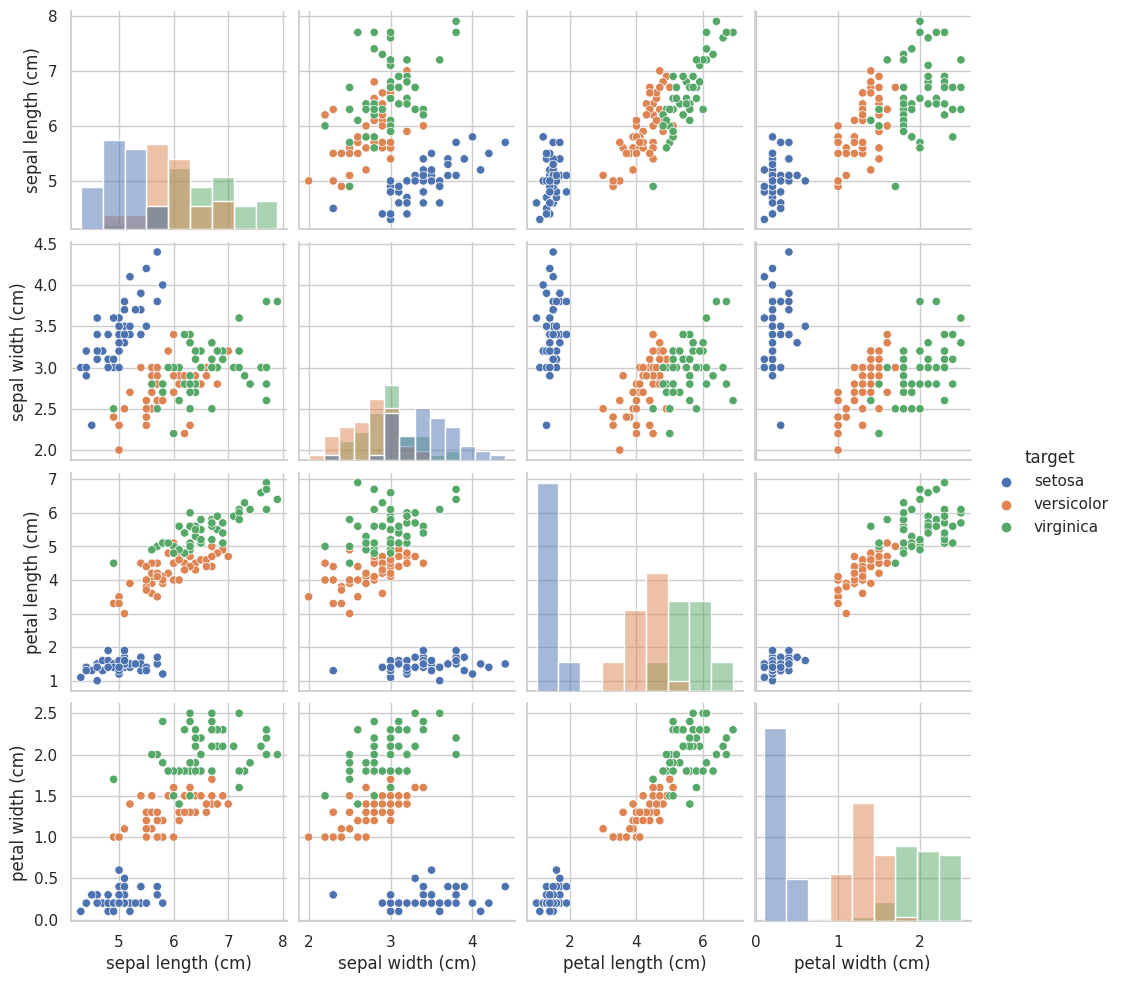

In [85]:
# Armado de un dataframe para facilitar la visualización
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Mapeo para darle nombre de las flores a la variable objetivo
class_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target'] = iris.target
df['target'] = df['target'].map(class_names)

# Análisis uni- y bi-variado de las variables
sns.pairplot(df, hue = 'target', diag_kind = "hist")
plt.show()

In [86]:
from sklearn import tree

In [87]:
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth = 3) # max_depth es la profundidad máxima del árbol
clf = clf.fit(X, y)

##### Plot tree

Un método para graficar los árboles de decisión es plot_tree, que ya está incluido en Scikit-learn.

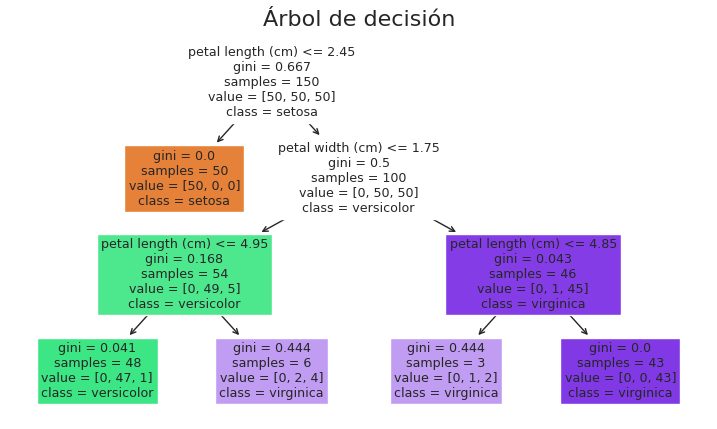

In [88]:
plt.figure(figsize = (9, 5))
tree.plot_tree(clf,
               filled = True,
               feature_names = iris.feature_names,
               class_names = iris.target_names
               )
plt.title('Árbol de decisión', fontsize = 16)

plt.show()

In [89]:
print('Accuracy del árbol de decisión =', clf.score(X, y).round(3)*100, '%.')

Accuracy del árbol de decisión = 97.3 %.


##### Contourf

Una de las posibilidades para graficar las superficies de decisión es el método contourf de de Matplotlib.

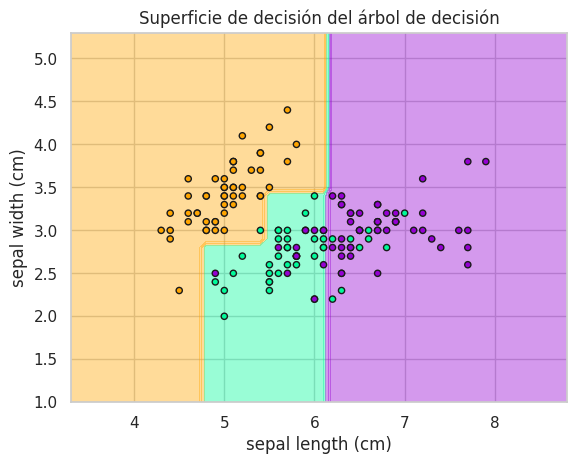

In [90]:
from matplotlib.colors import ListedColormap

X1 = X[:,:2]

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X1, y)

# Crear una malla de puntos para la visualización de la superficie de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir las clases para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_ concatena dos arrays armando un array con dos columnas
Z = Z.reshape(xx.shape)

# Graficar la superficie de decisión
cmap = ListedColormap(["orange", "mediumspringgreen", "darkviolet"])
plt.contourf(xx, yy, Z, alpha = 0.4, cmap = cmap)

# Graficamos los datos de las flores, mapeamos para asignar a cada flor un color
class_colores = {0: "orange", 1: "mediumspringgreen", 2: "darkviolet"}
ycolor = pd.Series(y).map(class_colores)
plt.scatter(X[:, 0], X[:, 1], c = ycolor.tolist(), s = 20, edgecolor = 'k')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Superficie de decisión del árbol de decisión')
plt.show()

##### Decision Boundary Display

Otro método para graficar estas superficies es DecisionBoundaryDisplay, alojado en Scikit-learn. Usémoslo para graficar todas las superficies de decisión que surgen de

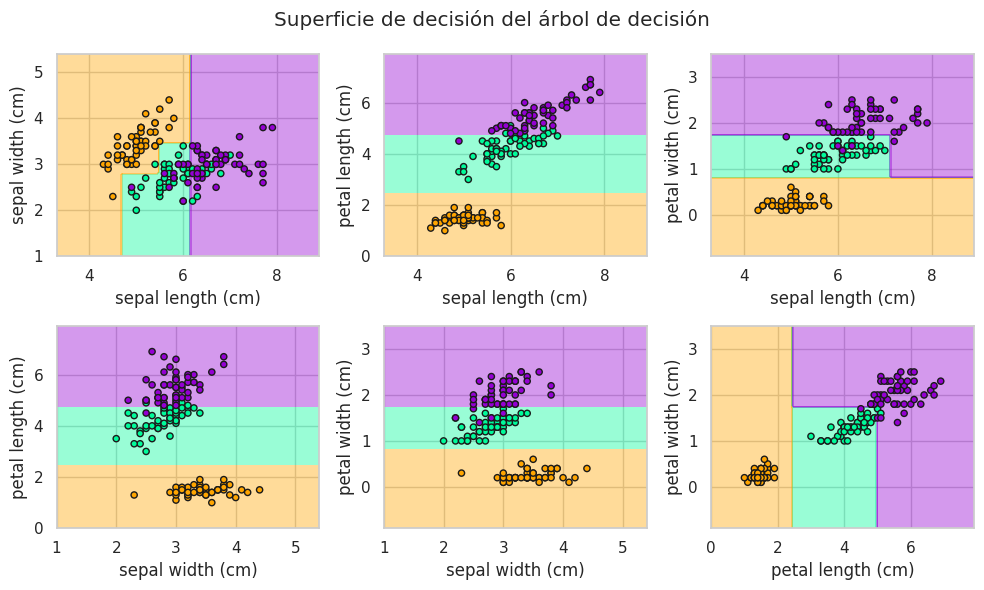

In [91]:
from sklearn.inspection import DecisionBoundaryDisplay

# Mapeamos para asignar a cada flor un color
class_colores = {0: "orange", 1: "mediumspringgreen", 2: "darkviolet"}
ycolor = pd.Series(y).map(class_colores)

plt.figure(figsize = (10, 6))

# Iteramos por sobre todas las combinaciones de variables
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # Definimos cada vez un nuevo subconjunto de datos a partir de las dos variables
    X2 = iris.data[:, pair]
    y = iris.target

    ax = plt.subplot(2, 3, pairidx + 1)

    # Aplicamos el árbol de decisión
    clf = tree.DecisionTreeClassifier(max_depth = 3).fit(X2, y)

    # Graficamos la superficie de decisión
    DecisionBoundaryDisplay.from_estimator(clf, X2,
                                           xlabel = iris.feature_names[pair[0]], ylabel = iris.feature_names[pair[1]],
                                           cmap = ListedColormap(["orange", "mediumspringgreen", "darkviolet"]),
                                           alpha = 0.4,
                                           ax = ax)

    # Graficamos los datos
    ax.scatter(X2[:, 0], X2[:, 1], c = ycolor.tolist(), s = 20, edgecolor = 'k')

plt.suptitle('Superficie de decisión del árbol de decisión')
plt.tight_layout()

In [92]:
# Nota: hay formas automáticas de hacer esas permutaciones
import itertools
s = [0, 1, 2, 3]
list(itertools.combinations(s, 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

##### Graphviz

Otra manera de graficar los árboles es utilizando [Graphviz](https://graphviz.readthedocs.io/en/stable/index.html), librería especializada en la visualización de grafos. Sin embargo, en este caso la la utilizaremos a través de Scikit-learn utilizando el método [tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).

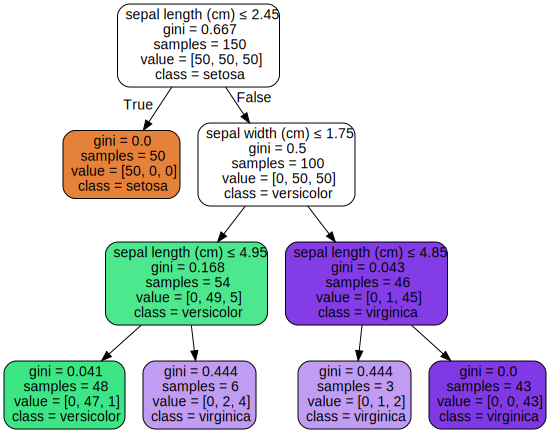

In [93]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = iris.feature_names[:2],
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)

graph = graphviz.Source(dot_data)
graph

Ahora grafiquemos un árbol de decisión en el cual no fijamos la profundidad máxima (max_depth), incurriendo (muy) posiblemente en sobreajuste.

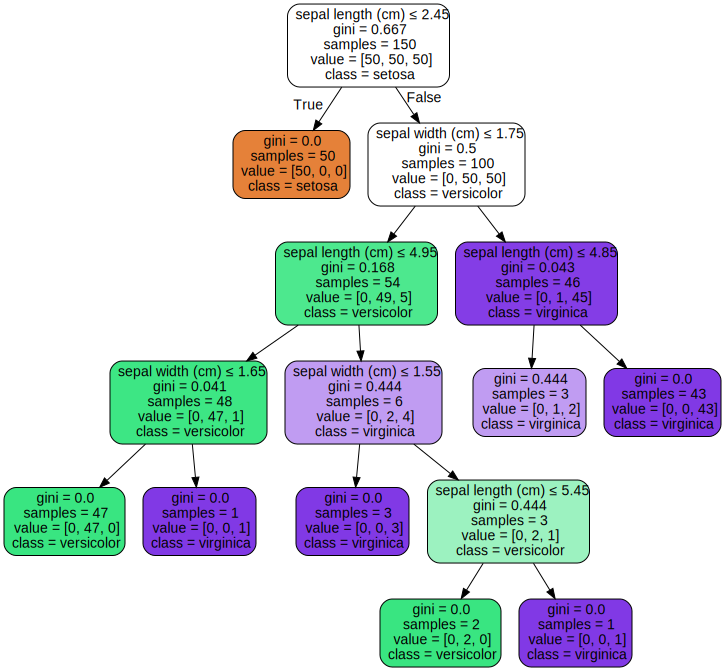

In [94]:
clf = tree.DecisionTreeClassifier().fit(X2, y)

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = iris.feature_names[:2],
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

Grafiquemos una superficie de decisión de este árbol de clasificación.

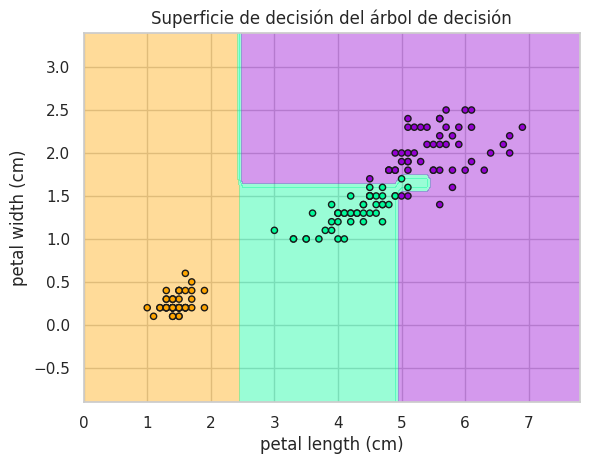

In [95]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir las clases para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la superficie de decisión
cmap = ListedColormap(["orange", "mediumspringgreen", "darkviolet"])
plt.contourf(xx, yy, Z, alpha = 0.4, cmap = cmap, levels = 3)

# Graficamos los datos de las flores
class_colores = {0: "orange", 1: "mediumspringgreen", 2: "darkviolet"}
ycolor = pd.Series(y).map(class_colores)
plt.scatter(X2[:, 0], X2[:, 1], c = ycolor.tolist(), s = 20, edgecolor = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Superficie de decisión del árbol de decisión')
plt.show()

#### Regresión

Para los árboles de decisión de regresión utilizaremos la base de datos de  [California](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

In [96]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [97]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [98]:
print(california.target_names)

['MedHouseVal']


In [99]:
# Aplicaremos un modelo de regresión utilizando una sóla variable predictora
X4 = california.data[:, 0]
y4 = california.target

# Ordenamos X e y de forma ascendente
sort_idx = X4.flatten().argsort()
X4 = X4[sort_idx].reshape(-1, 1)
y4 = y4[sort_idx]

In [100]:
clf2 = tree.DecisionTreeRegressor(max_depth = 3)
clf2 = clf2.fit(X4, y4)

Apliquemos Graphviz para visualizar el árbol de decisión.

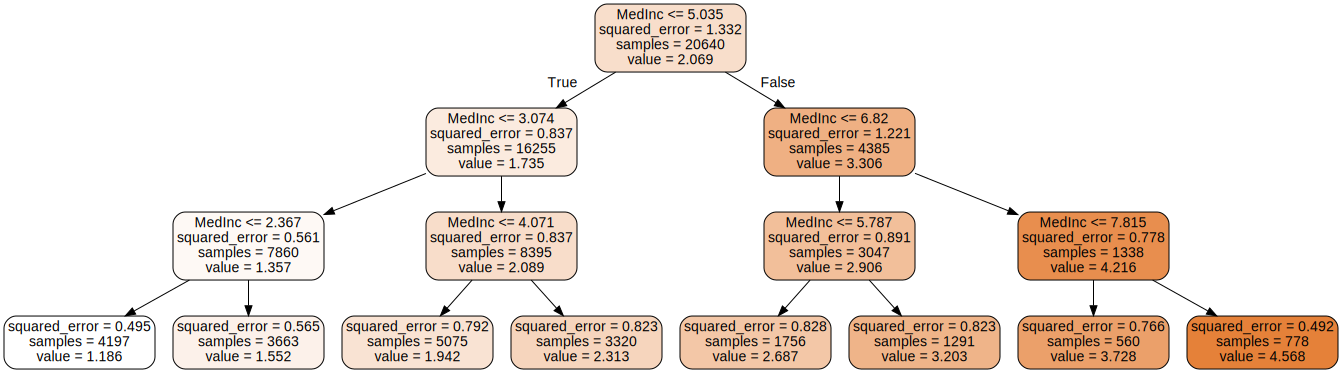

In [101]:
dot_data = tree.export_graphviz(clf2, feature_names = [california.feature_names[0]],
                                out_file = None,
                                filled = True, rounded = True)

graph = graphviz.Source(dot_data)
graph

Ahora grafiquemos la regresión realizada por el árbol de decisión.

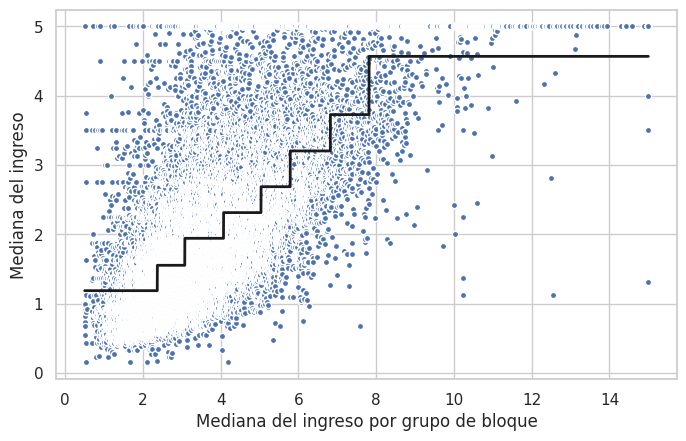

In [104]:
plt.figure(figsize = (8, 4.8))

plt.scatter(X4, y4, edgecolor = 'w', s = 20)
plt.plot(X4, clf2.predict(X4), color = 'k', lw = 2)

plt.xlabel('Mediana del ingreso por grupo de bloque')
plt.ylabel('Mediana del ingreso')
plt.show()

## Actividad práctica

Usando el dataset [Wine recognition](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) realizar los siguientes procedimientos:



1.   Realizar un PCA, proyectando a dos o tres dimensiones y realizar el correspondiente gráfico. Chequear la ortogonalidad de los vectores de máxima varianza.
2.   Aplicar modelo de árbol de decisión al dataset. ¿Estamos en un problema de clasificación o de regresión? Graficar el árbol de decisión y la superficie de decisión o la regresión, según corresponda.

In [103]:
wine = datasets.load_wine()

df_wine = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df_wine['target'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
